In [1]:
import pandas as pd
train=pd.read_csv(r'loandata.csv')
test=pd.read_csv(r'loantest.csv')

In [144]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [145]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [47]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
from sklearn.neighbors import KNeighborsClassifier
#using KNN classifier for imputing missing categorical value
def knn_classifier(df,q):
    index=pd.isnull(df[q])
    missing=np.where(index==True)[0]
    nomissing=np.where(index==False)[0]
    x=df[['Education','ApplicantIncome','CoapplicantIncome','Property_Area']].values
    x_train=x[nomissing,:]
    x_test=x[missing,:]
    y_test=df[q][missing]
    y_train=df[q][nomissing]
    clf=KNeighborsClassifier(5,weights='distance')
    clf.fit(x_train,y_train)
    df[q][missing]=clf.predict(x_test)
    print(clf.predict(x_test))

In [11]:
#converting categorical value from string to integer
def categorical(df,q):
    for i in q:
        df[i].astype('category')
        df[i]=pd.Categorical(df[i]).codes

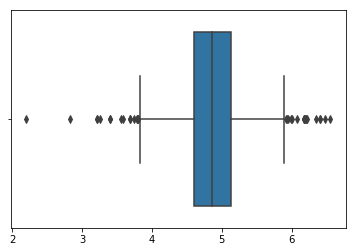

In [4]:
import seaborn as sb
import numpy as np
sb.boxplot(np.log(train['LoanAmount'].dropna().values))

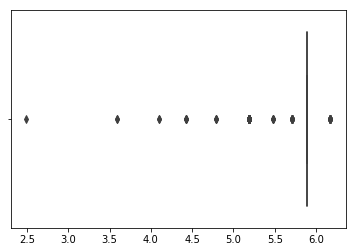

In [7]:
sb.boxplot(np.log(train['Loan_Amount_Term'].dropna().values))

In [8]:
np.log(train['LoanAmount'])

0           NaN
1      4.852030
2      4.189655
3      4.787492
4      4.948760
5      5.587249
6      4.553877
7      5.062595
8      5.123964
9      5.855072
10     4.248495
11     4.691348
12     5.298317
13     4.736198
14     2.833213
15     4.828314
16     4.605170
17     4.330733
18     4.890349
19     4.744932
20     4.644391
21     5.752573
22     4.753590
23     4.718499
24     5.017280
25     5.252273
26     4.804021
27     4.700480
28     3.555348
29     4.787492
         ...   
584    4.983607
585    5.147494
586    4.644391
587    4.248495
588    4.543295
589    4.663439
590    4.025352
591    5.323010
592    5.676754
593    4.955827
594    5.560682
595    4.700480
596    5.231109
597    4.477337
598    5.192957
599    5.257495
600    5.857933
601    5.043425
602    4.852030
603    5.147494
604    6.206576
605         NaN
606    5.153292
607    5.056246
608    4.682131
609    4.262680
610    3.688879
611    5.533389
612    5.231109
613    4.890349
Name: LoanAmount, Length

In [26]:
#imputing missing continuous value with median as there is outliers
#imputing one column with mode
def fill_with_value(df):
    df['LoanAmount']=np.log(df['LoanAmount'])
    df['LoanAmount'].fillna(np.median(df['LoanAmount'].dropna().values),inplace=True)
    df['TotalAmount']=np.log(df['ApplicantIncome']+df['CoapplicantIncome'])
    df['Loan_Amount_Term'].fillna(np.median(df['Loan_Amount_Term'].dropna().values),inplace=True)
    df['Credit_History'].fillna(1,inplace=True)

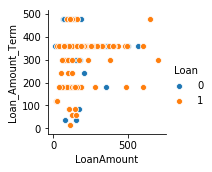

In [121]:
sb.pairplot(df,x_vars=['LoanAmount'],y_vars=['Loan_Amount_Term'],hue='Loan')

In [12]:
#converting the features in present list l into integer categories
l=['Education','Property_Area','Loan_Status']
categorical(train,l)

In [15]:
#
knn_classifier(train,'Gender')
knn_classifier(train,'Self_Employed')
knn_classifier(train,'Dependents')
knn_classifier(train,'Married')

['Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Male' 'Male' 'Male' 'Male'
 'Male' 'Male' 'Male']
['No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No']
['1' '0' '0' '1' '3+' '0' '0' '0' '2' '0' '1' '0' '1' '1' '0']
['Yes' 'Yes' 'Yes']


/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

In [16]:
categorical(train,['Gender','Self_Employed','Dependents','Married'])

In [27]:
fill_with_value(train)

In [28]:
train.drop(labels='Loan_ID',axis=1,inplace=True)

KeyError: "['Loan_ID'] not found in axis"

In [64]:
#spliting train data into train and validation set
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def classify(df):
    c=df.columns.values.tolist()
    c.remove('ApplicantIncome')
    c.remove('CoapplicantIncome')
    c[-1],c[-2]=c[-2],c[-1]
    x_train,x_test,y_train,y_test=train_test_split(df[c[:-1]],df[c[-1]],test_size=0.33)
    classifier = GaussianNB()
    classifier.fit(x_train, y_train)
    print("Naiv bayes classifier accuracy:",accuracy_score(classifier.predict(x_test),y_test))
    classifier=DecisionTreeClassifier()
    classifier.fit(x_train,y_train)
    print("Decision Tree classifier accuracy:",accuracy_score(classifier.predict(x_test),y_test))
    classifier=KNeighborsClassifier(5,weights='distance')
    classifier.fit(x_train,y_train)
    print("KNN accuracy",accuracy_score(classifier.predict(x_test),y_test))
    

In [65]:
classify(train)

Naiv bayes classifier accuracy: 0.8325123152709359
Decision Tree classifier accuracy: 0.7044334975369458
KNN accuracy 0.729064039408867


In [66]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [67]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [68]:
store=test['Loan_ID']
test.drop(labels='Loan_ID',axis=1,inplace=True)

In [69]:
l=['Education','Property_Area']
categorical(test,l)

In [70]:
knn_classifier(test,'Gender')
knn_classifier(test,'Self_Employed')
knn_classifier(test,'Dependents')
#knn_classifier(test,'Married')

['Male' 'Male' 'Female' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male'
 'Male']
['No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No']
['1' '0' '3+' '0' '1' '3+' '2' '0' '3+' '0']


/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [71]:
fill_with_value(test)

In [72]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
TotalAmount          0
dtype: int64

In [73]:
categorical(test,['Gender','Self_Employed','Dependents','Married'])

In [81]:
test.drop(labels=['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [82]:
classifier.predict(test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,

In [83]:
submission=pd.DataFrame()
submission['Loan_ID']=store
submission['Loan_Status']=classifier.predict(test)

In [84]:
submission

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
5,LP001054,1
6,LP001055,1
7,LP001056,1
8,LP001059,1
9,LP001067,1


In [85]:
submission.to_csv('LoanPredicted.csv',index=False)